<a href="https://colab.research.google.com/github/ednavivianasegura/ERAP_Curso_R/blob/main/BackUpsInicial/redes_convolucionales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Autores:** Edna Viviana Segura Alvarado - Hans Mauricio Carrillo Hernández

**Institución:** Universidad de la Rioja

**Fecha:** Junio/2025

**Clasificación de Imágenes con Redes Neuronales Convolucionales**

Las redes neuronales convolucionales son conocidas habitualmente por sus siglas en inglés, CNNs (Convolutional Neural Networks).


### Librerías

Verificación versión de TensorFlow

In [4]:
import matplotlib.pyplot as plt
import random
import os
from PIL import Image
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.18.0


Los imágenes a clasificar son tomadas de:

Julien de la Bruère-Terreault, conjunto de datos "Rock-Paper-Scissors Images", disponible bajo la licencia CC BY-SA 4.0 (https://creativecommons.org/licenses/by-sa/4.0/) en https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors

In [2]:
# Clonar repositorio
!git clone https://github.com/ednavivianasegura/ERAP_CursoPython/



Cloning into 'ERAP_CursoPython'...
remote: Enumerating objects: 871, done.
remote: Counting objects: 100% (167/167), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 871 (delta 140), reused 86 (delta 81), pack-reused 704 (from 2)
Receiving objects: 100% (871/871), 54.01 MiB | 8.69 MiB/s, done.
Resolving deltas: 100% (409/409), done.


In [15]:
# Esta es la ruta donde Kaggle monta los datasets de input
path = "/kaggle/input/rockpaperscissors"

# Verifica la estructura del directorio
print("Contenido del directorio:")
print(os.listdir(path))



Contenido del directorio:
['paper', 'rock', 'rps-cv-images', 'README_rpc-cv-images.txt', 'scissors']


In [24]:
print(len(os.listdir(path + "/" + "rock")))
print(len(os.listdir(path + "/" + "paper")))
print(os.listdir(path + "/" + "scissors"))

726
712
['TfQG2fJYyDv8Ic8P.png', 'EesxTpYzhZoMVlH8.png', '8Gew5erdZ7A4K3gI.png', 'RydyYWgvhLQPwEaw.png', '256MrhkDete6aQhP.png', 'o1cPo5Z2YLfTz2vJ.png', 'jWUoY57nkFKUUdD5.png', 'cDveaur4dR2ZCCo8.png', 'JSDICtLrQIEXhPy5.png', 'eqJEQe8W9FP4TOck.png', 'j1EfA5DclfCJdzLb.png', 'FoYWUBXBw6qO7y0f.png', 'cPuxKnJCdcTotM5k.png', '7vtC68OSHd1FZJvN.png', 'OA0s5AsfJEm96cxd.png', 'aMAVOdimraDSK6P1.png', 'gzRmdTIFRzV34Vjl.png', 'jMVjrTQfvJ0xLTOt.png', 'zdo3LHesq3aHmu1f.png', 'lhD4U5er2UL6nfAH.png', '8Q1PAZsxpLf5FAo6.png', 'kC1AoCFrvaMKlTDk.png', 'NR48QMe5e1gskpA9.png', '2C9FEbBklwcVhF3W.png', 'mmLhBFvXWgD957XY.png', 'QGySPOxev60wlq1M.png', 'vMAludIRGF14FuGn.png', 'WUEe440w137BuSEE.png', 'pZ9zE5ahoKZhIZqm.png', '3n4i3lKB3nZOpDVv.png', 'bn7yju6XvU87slzH.png', '2ZPcSpOm7SEfQYwg.png', 'KSNET1XTWbrg5Rcz.png', 'oYB271o4Oo5uFHpW.png', '55yz6JI9f5DTbq9D.png', '5DdrFpDc8YbG1oCo.png', '64ktckSF0c26K6AY.png', 'oxyMOfWC1lQU6dRf.png', '5mipmm4t8RM5o0tW.png', 'wT8z7icdMJt816Ix.png', 'UPH9bl4Vrq4Gwp3K.png', 'FCsZ8x

### Cargar Imágenes del repositorio:

Se considera que las imágenes están organizadas por categoría, almacenadas en directorios separados llamados *rock*, *paper* y *scissors*. Dentro de cada uno, los archivos de imagen están nombrados secuencialmente desde 0.png hasta 699.png, representando su número correspondiente.


In [25]:
import random

# Descripción de clases y su identificador
descripcion = ("paper", "rock", "scissors")
clases = {"paper": 0, "rock": 1, "scissors": 2}

# Número de imágenes de cada clase a considerar (máximo 700)
num_img_clase = 700

# Porcentajes de división
train_ratio = 0.7
test_ratio = 0.3

# Calcular número de imágenes para entrenamiento y prueba
num_entrena = round(num_img_clase * train_ratio)
num_prueba = round(num_img_clase * test_ratio)

# Inicializar arrays para almacenar los datos
imagenes_entrena = np.empty((num_entrena * len(clases), 200, 300, 3), dtype="uint8")
clases_entrena = np.empty(num_entrena * len(clases), dtype="uint8")

imagenes_prueba = np.empty((num_prueba * len(clases), 200, 300, 3), dtype="uint8")
clases_prueba = np.empty(num_prueba * len(clases), dtype="uint8")

# Para cada clase, seleccionar 700 imágenes aleatorias y dividirlas en train/test
for clase in clases:
    # Obtener lista de todos los archivos en el directorio de la clase
    archivos = os.listdir(path + "/" + clase)

    # Seleccionar aleatoriamente 700 imágenes (sin repetición)
    archivos_seleccionados = random.sample(archivos, num_img_clase)

    # Dividir en conjuntos de entrenamiento y prueba
    archivos_train = archivos_seleccionados[:num_entrena]
    archivos_test = archivos_seleccionados[num_entrena:num_img_clase]

    # Cargar imágenes de entrenamiento
    for i, archivo in enumerate(archivos_train):
        imagen = Image.open(os.path.join(path, clase, archivo))
        indice = i + clases[clase] * num_entrena
        imagenes_entrena[indice] = np.array(imagen)
        clases_entrena[indice] = clases[clase]

    # Cargar imágenes de prueba
    for i, archivo in enumerate(archivos_test):
        imagen = Image.open(os.path.join(path, clase, archivo))
        indice = i + clases[clase] * num_prueba
        imagenes_prueba[indice] = np.array(imagen)
        clases_prueba[indice] = clases[clase]

# Verificación
print(f"Total imágenes entrenamiento: {len(imagenes_entrena)}")
print(f"Total imágenes prueba: {len(imagenes_prueba)}")
print("¡Datos cargados exitosamente!")

Total imágenes entrenamiento: 1470
Total imágenes prueba: 630
¡Datos cargados exitosamente!


# Visualización de imágenes aleatorias

In [ ]:
# Crear una figura de matplotlib con tamaño 10x10 pulgadas
plt.figure(figsize=(10, 10))

# Mostrar 100 imágenes en una cuadrícula de 10x10
for i in range(100):
    # Crear subplot en posición i+1 (comienza en 1, no en 0)
    plt.subplot(10, 10, i + 1)

    # Seleccionar un índice aleatorio dentro del rango de imágenes de entrenamiento
    indice = random.randint(0, num_entrena*len(clases) - 1)

    # Mostrar la imagen correspondiente al índice seleccionado
    # Se usa cmap="gray" para mostrar en escala de grises (aunque las imágenes son RGB)
    plt.imshow(imagenes_entrena[indice], cmap="gray")

    # Añadir etiqueta (clase) como texto en la parte inferior
    plt.xlabel(descripcion[clases_entrena[indice]])

    # Configuraciones de estilo para mejorar la visualización:
    plt.grid(False)    # Desactivar cuadrícula
    plt.box(False)     # Desactivar borde alrededor de la imagen
    plt.xticks([])     # Eliminar marcas del eje X
    plt.yticks([])     # Eliminar marcas del eje Y

# Mostrar la figura completa con todas las sub-imágenes
plt.show()

## Visualización de una sola imagen en tamaño grande

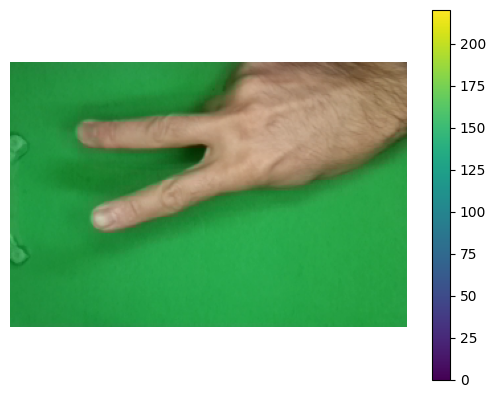

In [27]:
plt.figure()
plt.imshow(imagenes_prueba[502])
plt.colorbar()
plt.grid(False)
plt.box(False)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

### Escalar los píxeles de las imágenes del rango [0, 255] al rango [0, 1]

In [28]:
imagenes_entrena = imagenes_entrena / 255
imagenes_prueba = imagenes_prueba / 255

# Creación del modelo de la Red Neuronal Convolucional (CNN)

In [29]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 300, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(3),
    tf.keras.layers.Softmax()
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Cofigurar el Modelo para Entrenamiento

In [30]:
modelo.compile(optimizer="sgd",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

# Entrena el Modelo (es decir, la Red Neuronal Convolucional)

In [ ]:
modelo.fit(imagenes_entrena, clases_entrena, epochs=10)

Epoch 1/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - accuracy: 0.3946 - loss: 1.1151
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.4257 - loss: 1.0738
Epoch 3/10
20/46 ━━━━━━━━━━━━━━━━━━━━ 1:08 3s/step - accuracy: 0.5024 - loss: 1.0120

# Evalúa el modelo (porcentaje de aciertos con datos de prueba)

In [ ]:
perdida, exactitud = modelo.evaluate(imagenes_prueba, clases_prueba)
print("Exactitud (Accuracy) = aciertos_prueba / imagenes_de_prueba):", exactitud)

# Clasifica las Imágenes de Prueba con la Red Convolucional

In [ ]:
predicciones = modelo.predict(imagenes_prueba)

# Salida de la Red Neuronal para cada Imagen de Prueba

In [ ]:
# Creación de arreglo para almacenar predicciones
clase_predicha = np.empty(num_prueba * len(clases), dtype = "uint8")

for instancia in range(num_prueba * len(clases)):
  # almacena clase predicha para una imagen dada
  clase_predicha[instancia] = np.argmax(predicciones[instancia])
  if clase_predicha[instancia] == clases_prueba[instancia]:
    print("Probabilidades:", predicciones[instancia],
          "Clase predicha:", clase_predicha[instancia],
          "Clase correcta:", clases_prueba[instancia],
          "La Red Neuronal ACERTÓ")
  else:
    print("Probabilidades:", predicciones[instancia],
          "Clase predicha:", clase_predicha[instancia],
          "Clase correcta:", clases_prueba[instancia],
          "La Red Neuronal ERRÓ")

# Matriz de Confusión: Resultado de Evaluación a Detalle

In [ ]:
# papel : 0     piedra : 1     tijera : 2
matriz = tf.math.confusion_matrix(clases_prueba, clase_predicha)
print("Matriz de Confusión:\n", matriz.numpy())